In [1]:
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd
import datetime
import time

import numpy as np

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
style.use(style='seaborn-deep')
import seaborn as sns
from matplotlib import rcParams
from sklearn.cluster import MiniBatchKMeans, KMeans
import math
import pickle
import os

import xgboost as xgb

import networkx as nx
import pdb
import pickle
from pandas import HDFStore
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
df_final_train = read_hdf(path_or_buf='data/fea_sample/storage_sample_stage4.h5', key='train_df', mode='r')
df_final_test = read_hdf(path_or_buf='data/fea_sample/storage_sample_stage4.h5', key='test_df', mode='r')

In [3]:
print(df_final_train.columns)

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')


In [4]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [5]:
print(y_train.head())
print(y_train.tail())

0    1
1    1
2    1
3    1
4    1
Name: indicator_link, dtype: int64
99997     0
99998     0
99999     0
100000    0
100001    0
Name: indicator_link, dtype: int64


In [6]:
df_final_train.drop(labels=['source_node', 'destination_node','indicator_link'], axis=1, inplace=True)
df_final_test.drop(labels=['source_node', 'destination_node','indicator_link'], axis=1, inplace=True)

In [7]:
def plotting(x, xlabel, ylabel, title):
    """
    This method plots.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(x, train_scores, label='Train Score')
    plt.plot(x, test_scores, label='Test Score')
    plt.xlabel(xlabel=xlabel)
    plt.ylabel(ylabel=ylabel)
    plt.title(label=title)
    plt.grid()
    plt.legend()
    plt.show()

In [8]:
estimators = [10, 50, 100, 250, 450]
train_scores = []
test_scores = []

for estim in estimators:
    clf = RandomForestClassifier(n_estimators=estim, bootstrap=True, class_weight=None, 
                                 criterion='gini', max_depth=5, max_features='auto', 
                                 max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                 min_samples_leaf=52, min_samples_split=120, 
                                 min_weight_fraction_leaf=0.0, n_jobs=-1, 
                                 random_state=25, verbose=0, warm_start=False)
    clf.fit(X=df_final_train, y=y_train)
    
    y_train_pred = clf.predict(X=df_final_train)
    train_sc = f1_score(y_true=y_train, y_pred=y_train_pred)
    train_scores.append(train_sc)
    
    y_test_pred = clf.predict(X=df_final_test)
    test_sc = f1_score(y_true=y_test, y_pred=y_test_pred)
    test_scores.append(test_sc)
    
    print("Estimators = {}, Train Score: {}, Test Score: {}".format(estim, train_sc, test_sc))

Estimators = 10, Train Score: 0.9063252121775113, Test Score: 0.8745605278006858
Estimators = 50, Train Score: 0.9205725512208812, Test Score: 0.9125653355634538
Estimators = 100, Train Score: 0.9238690848446947, Test Score: 0.9141199714153599
Estimators = 250, Train Score: 0.9239789348046863, Test Score: 0.9188007232664732
Estimators = 450, Train Score: 0.9237190618658074, Test Score: 0.9161507685828595


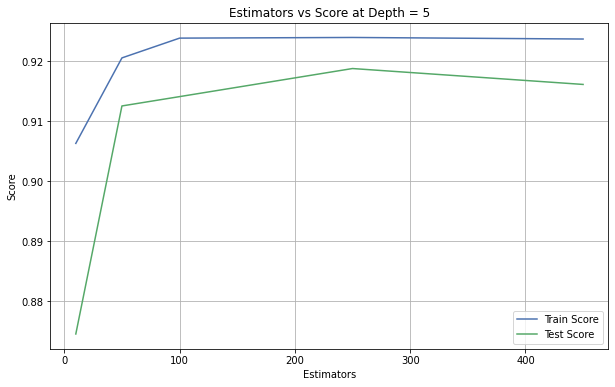

In [9]:
plotting(x=estimators, xlabel='Estimators', ylabel='Score', title='Estimators vs Score at Depth = 5')

In [10]:
depths = [3, 9, 11, 15, 20, 35, 50, 70, 130]
train_scores = []
test_scores = []

for dep in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                                 max_depth=dep, max_features='auto', max_leaf_nodes=None, 
                                 min_impurity_decrease=0.0, min_samples_leaf=52, n_jobs=-1, 
                                 min_samples_split=120, min_weight_fraction_leaf=0.0, 
                                 n_estimators=115, random_state=25, verbose=0, warm_start=False)
    clf.fit(X=df_final_train, y=y_train)
    
    y_train_pred = clf.predict(X=df_final_train)
    train_sc = f1_score(y_true=y_train, y_pred=y_train_pred)
    train_scores.append(train_sc)
    
    y_test_pred = clf.predict(X=df_final_test)
    test_sc = f1_score(y_true=y_test, y_pred=y_test_pred)
    test_scores.append(test_sc)
    
    print("Depth = {}, Train Score: {}, Test Score: {}".format(dep, train_sc, test_sc))

Depth = 3, Train Score: 0.8916120853581238, Test Score: 0.8687934859875491
Depth = 9, Train Score: 0.9572226298198419, Test Score: 0.9222953031452904
Depth = 11, Train Score: 0.9623451340902863, Test Score: 0.9252318758281279
Depth = 15, Train Score: 0.9634267621927706, Test Score: 0.9231288356496615
Depth = 20, Train Score: 0.9631629153051491, Test Score: 0.9235051024711141
Depth = 35, Train Score: 0.9634333127085721, Test Score: 0.9235601652753184
Depth = 50, Train Score: 0.9634333127085721, Test Score: 0.9235601652753184
Depth = 70, Train Score: 0.9634333127085721, Test Score: 0.9235601652753184
Depth = 130, Train Score: 0.9634333127085721, Test Score: 0.9235601652753184


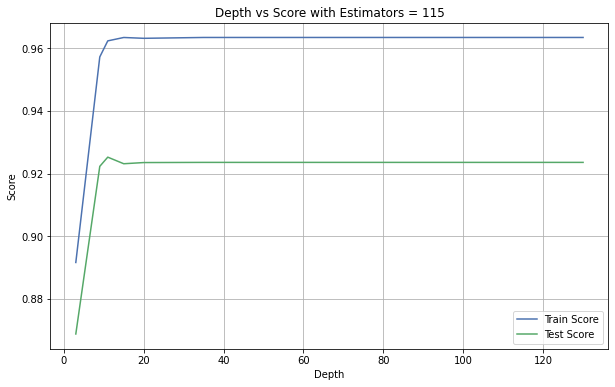

In [11]:
plotting(x=depths, xlabel='Depth', ylabel='Score', title='Depth vs Score with Estimators = 115')

In [12]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators": sp_randint(105, 125),
              "max_depth": sp_randint(10, 15),
              "min_samples_split": sp_randint(110, 190),
              "min_samples_leaf": sp_randint(25, 65)}

clf = RandomForestClassifier(random_state=25, n_jobs=-1)

rf_random = RandomizedSearchCV(estimator=clf, 
                               param_distributions=param_dist,
                               n_iter=5,
                               cv=10,
                               scoring='f1',
                               return_train_score=True,
                               random_state=25)
rf_random.fit(X=df_final_train, y=y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff31e803220>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff31e803670>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff31e926dd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff31e99b8b0>},
                   random_state=25, return_train_score=True, scoring='f1')

In [13]:
print("Mean train scores: {}".format(rf_random.cv_results_['mean_train_score']))
print("Mean test scores: {}".format(rf_random.cv_results_['mean_test_score']))

Mean train scores: [0.96294922 0.96266735 0.96115674 0.96263457 0.96430539]
Mean test scores: [0.96225042 0.96215492 0.9605708  0.96194014 0.96330005]


In [14]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [15]:
clf = RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                             n_estimators=121, n_jobs=-1, random_state=25)

In [16]:
clf.fit(X=df_final_train, y=y_train)
y_train_pred = clf.predict(X=df_final_train)
y_test_pred = clf.predict(X=df_final_test)

In [17]:
print("Train f1 score: {}".format(f1_score(y_true=y_train, y_pred=y_train_pred)))
print("Test f1 score: {}".format(f1_score(y_true=y_test, y_pred=y_test_pred)))

Train f1 score: 0.9652533106548414
Test f1 score: 0.9241678239279553


In [18]:
labels = clf.classes_

In [19]:
def plot_heatmap(matrix, title, labels):
    """
    This function plots the heatmap.
    """
    plt.figure(figsize=(14, 7))
    sns.heatmap(data=matrix,
                annot=True,
                fmt='.2f',
                linewidths=0.1,
                xticklabels=labels,
                yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title(label=title)
    plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    """
    This function plots:
        1. Confusion matrix
        2. Precision matrix
        3. Recall matrix
    """
    cmat = confusion_matrix(y_true=y_true, y_pred=y_pred)
    pmat = cmat / cmat.sum(axis=0) # axis = 0: consider all the rows in each column
    print("Column sum of precision matrix: {}".format(pmat.sum(axis=0)))
    rmat = ((cmat.T) / (cmat.sum(axis=1).T)).T # axis = 1: consider all the columns in each row
    print("Row sum of recall matrix:       {}".format(rmat.sum(axis=1)))
    
    plot_heatmap(matrix=cmat, title='Confusion Matrix', labels=labels)
    plot_heatmap(matrix=pmat, title='Precision Matrix', labels=labels)
    plot_heatmap(matrix=rmat, title='Recall Matrix', labels=labels)

Train confusion_matrix
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


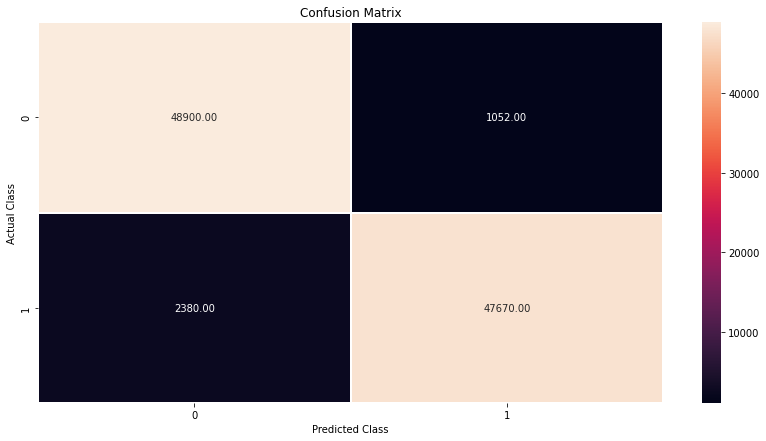

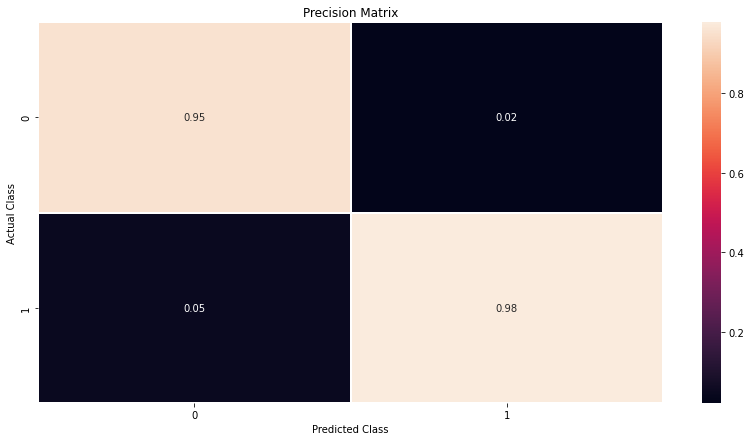

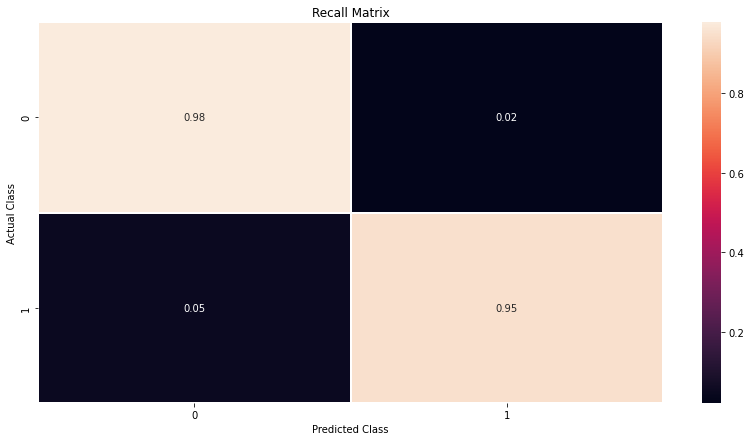

Test confusion_matrix
Column sum of precision matrix: [1. 1.]
Row sum of recall matrix:       [1. 1.]


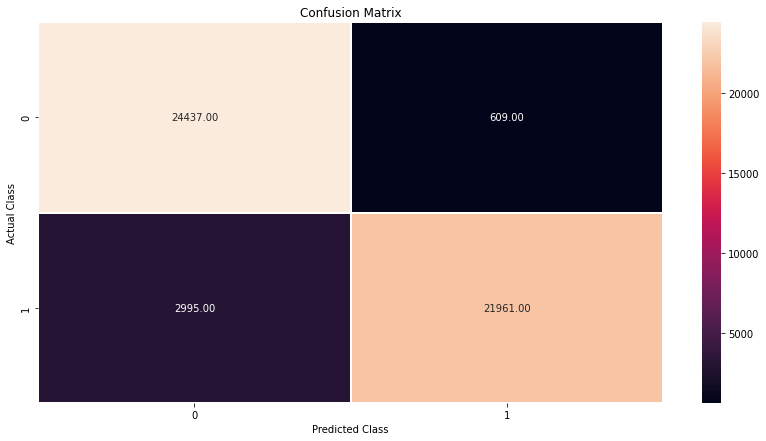

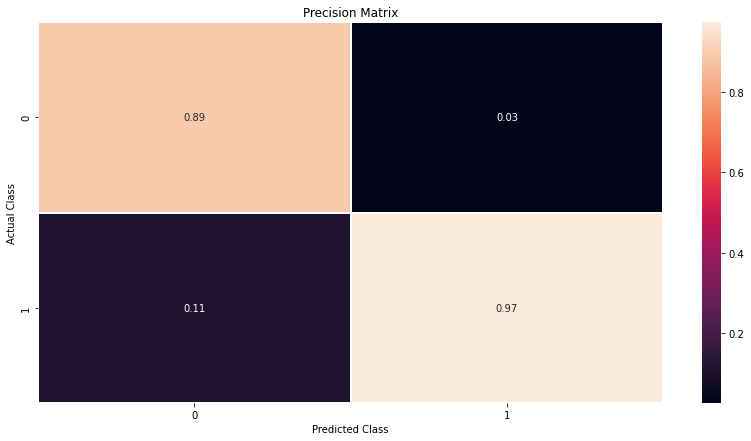

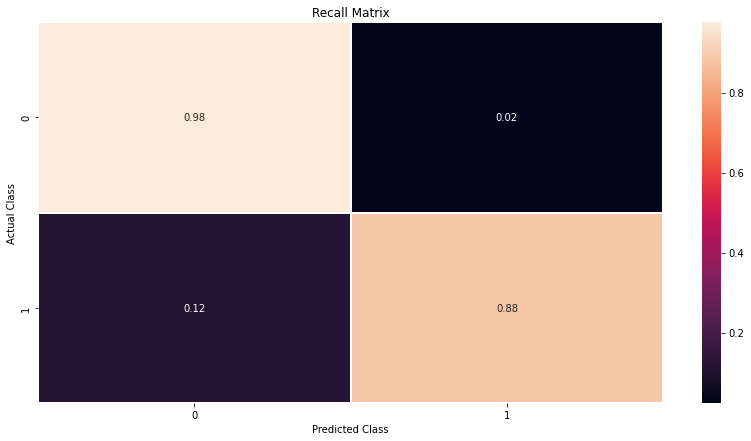

In [21]:
print('Train confusion_matrix')
plot_confusion_matrix(y_true=y_train, y_pred=y_train_pred, labels=labels)
print('Test confusion_matrix')
plot_confusion_matrix(y_true=y_test, y_pred=y_test_pred, labels=labels)

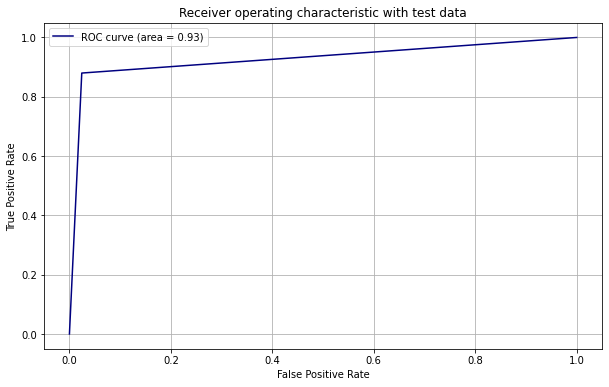

In [22]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, ths = roc_curve(y_true=y_test, y_score=y_test_pred)
auc_sc = auc(x=fpr, y=tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='navy', label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel(xlabel='False Positive Rate')
plt.ylabel(ylabel='True Positive Rate')
plt.title(label='Receiver operating characteristic with test data')
plt.grid()
plt.legend()
plt.show()

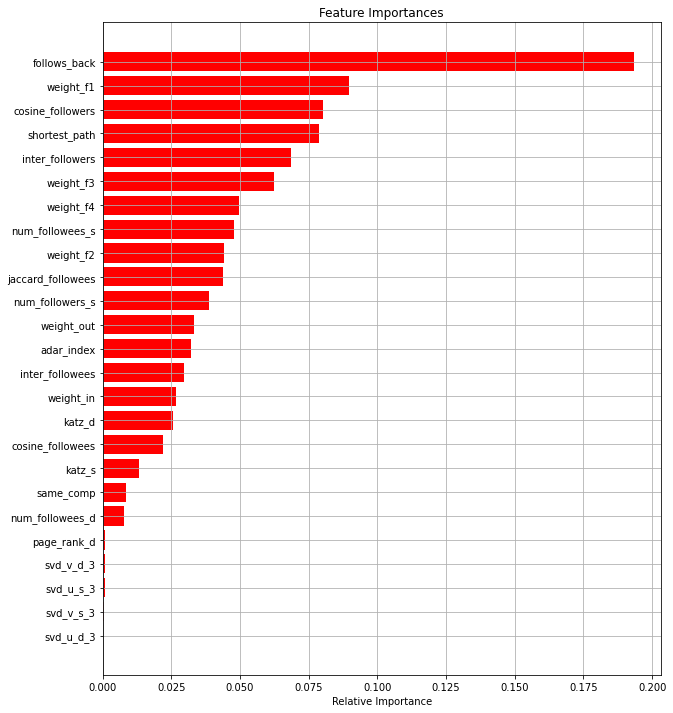

In [23]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]

plt.figure(figsize=(10,12))
plt.title(label='Feature Importances')
plt.barh(y=range(len(indices)), width=importances[indices], color='r', align='center')
plt.yticks(ticks=range(len(indices)), labels=[features[i] for i in indices])
plt.xlabel(xlabel='Relative Importance')
plt.grid()
plt.show()